# Wie viele einzigartige Wörter werden verwendet

In [1]:
import pandas as pd
df = pd.read_csv('lyrics_clean_utf8.csv',encoding ='utf-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259793 entries, 0 to 259792
Data columns (total 7 columns):
Unnamed: 0                      259793 non-null int64
song                            259792 non-null object
year                            259793 non-null int64
genre                           259793 non-null object
word_tokenize_no_punctuation    259793 non-null object
word_tokenize_length            259793 non-null int64
word_tokenize_no_stopwords      259793 non-null object
dtypes: int64(3), object(4)
memory usage: 13.9+ MB


In [2]:
df.head()

,Unnamed: 0,song,year,genre,word_tokenize_no_punctuation,word_tokenize_length,word_tokenize_no_stopwords
0,0,ego-remix,2009,Pop,"['oh', 'baby', 'how', 'you', 'doing', 'you', '...",474,"['oh', 'baby', 'know', ""'m"", 'gon', 'na', 'cut..."
1,1,then-tell-me,2009,Pop,"['playin', 'everything', 'so', 'easy', 'it', ""...",270,"['playin', 'everything', 'easy', ""'s"", 'like',..."
2,2,honesty,2009,Pop,"['if', 'you', 'search', 'for', 'tenderness', '...",177,"['search', 'tenderness', ""n't"", 'hard', 'find'..."
3,3,you-are-my-rock,2009,Pop,"['oh', 'oh', 'oh', 'i', 'oh', 'oh', 'oh', 'i',...",555,"['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'verse', ..."
4,4,black-culture,2009,Pop,"['party', 'the', 'people', 'the', 'people', 't...",338,"['party', 'people', 'people', 'party', ""'s"", '..."


## Entfernen von Trennzeichen
Entfernen der CSV Trenzeichen ' und "

In [3]:
df['word_tokenize_no_punctuation'] = df['word_tokenize_no_punctuation'].str.replace("'",'')
df['word_tokenize_no_punctuation'] = df['word_tokenize_no_punctuation'].str.replace('"','')
df['word_tokenize_no_stopwords'] = df['word_tokenize_no_stopwords'].str.replace("'",'')
df['word_tokenize_no_stopwords'] = df['word_tokenize_no_stopwords'].str.replace('"','')
df.head()

,Unnamed: 0,song,year,genre,word_tokenize_no_punctuation,word_tokenize_length,word_tokenize_no_stopwords
0,0,ego-remix,2009,Pop,"[oh, baby, how, you, doing, you, know, i, m, g...",474,"[oh, baby, know, m, gon, na, cut, right, chase..."
1,1,then-tell-me,2009,Pop,"[playin, everything, so, easy, it, s, like, yo...",270,"[playin, everything, easy, s, like, seem, sure..."
2,2,honesty,2009,Pop,"[if, you, search, for, tenderness, it, is, nt,...",177,"[search, tenderness, nt, hard, find, love, nee..."
3,3,you-are-my-rock,2009,Pop,"[oh, oh, oh, i, oh, oh, oh, i, verse, 1, if, i...",555,"[oh, oh, oh, oh, oh, oh, verse, 1, wrote, book..."
4,4,black-culture,2009,Pop,"[party, the, people, the, people, the, party, ...",338,"[party, people, people, party, s, popping, sit..."


## Zählen der Einzigartigen Wörter

In [4]:
df['einzigartig_count'] = df['word_tokenize_no_punctuation'].apply(lambda x: len(' '.join(str(s) for s in set(x))))

## Zusammenfassen und Beschreiben
describe() gibt zurück:  count: Anzahl der Objekte, mean: Durchschnitt, std: Standartabweichung, min-max: Angabe des wertes bei min, 25%, 50%, 75%, max

### Einzigartige Wörteranzahl nach Jahr zusammengefasst
mit describe() alle Lieder des selben Jahres beschrieben

In [5]:
grouped_by_year = df['einzigartig_count'].groupby(df['year']).describe()
grouped_by_year.head()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1970,165.0,53.096970,3.221922,45.0,51.0,53.0,55.0,67.0
1971,195.0,53.564103,3.509889,45.0,51.0,53.0,55.0,71.0
1972,190.0,54.473684,4.490654,45.0,51.0,53.0,57.0,79.0
1973,244.0,53.950820,3.420713,41.0,51.0,53.0,57.0,67.0
1974,158.0,55.215190,5.228951,43.0,51.5,55.0,57.0,75.0


## Ausgabe der Ergebnisse

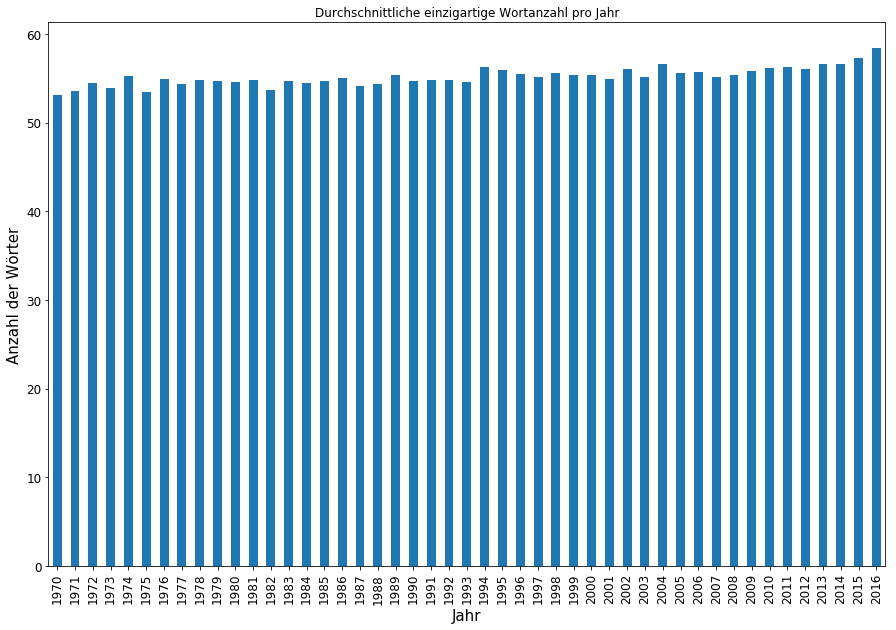

In [6]:
import matplotlib.pyplot as plt
plot_year = grouped_by_year['mean'].plot(kind='bar', title ="Durchschnittliche einzigartige Wortanzahl pro Jahr", figsize=(15, 10), fontsize=12)
plot_year.set_xlabel("Jahr", fontsize=15)
plot_year.set_ylabel("Anzahl der Wörter", fontsize=15)

plt.show()

## Durchschnittliche einzigartige Wortanzahl

In [7]:
overall= df['einzigartig_count'].mean()
overall

55.86903034338877